<a href="https://colab.research.google.com/github/EmmanuelChingozho/Chingozho_IT533/blob/main/West_Nile_Virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [99]:
West_Nile_Virus = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")

In [100]:

West_Nile_Virus.head(5)
#West_Nile_Virus.tail (7)


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [52]:
West_Nile_Virus.count()


SEASON YEAR             29489
WEEK                    29489
TEST ID                 29489
BLOCK                   29489
TRAP                    29489
TRAP_TYPE               29489
TEST DATE               29489
NUMBER OF MOSQUITOES    29489
RESULT                  29489
SPECIES                 29489
LATITUDE                25073
LONGITUDE               25073
LOCATION                25073
dtype: int64

In [53]:
West_Nile_Virus.describe(include='all') 

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
count,29489.000000,29489.000000,29489.000000,29489,29489,29489,29489,29489.000000,29489,29489,25073.000000,25073.000000,25073
unique,NaN,NaN,NaN,158,193,4,299,NaN,2,8,NaN,NaN,162
top,NaN,NaN,NaN,100XX W OHARE AIRPORT,T115,GRAVID,08/15/2007 12:08:00 AM,NaN,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,"(41.66238672759086, -87.59017972751752)"
freq,NaN,NaN,NaN,2949,787,27956,276,NaN,27001,13354,NaN,NaN,787
mean,2012.502018,31.073587,35155.917156,NaN,NaN,NaN,NaN,12.353827,NaN,NaN,41.836094,-87.687875,NaN
std,3.802700,4.533390,8630.314684,NaN,NaN,NaN,NaN,15.261187,NaN,NaN,0.112719,0.076802,NaN
min,2007.000000,20.000000,20000.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,41.644720,-87.854473,NaN
25%,2009.000000,28.000000,27718.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,41.731447,-87.745420,NaN
50%,2012.000000,31.000000,35150.000000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,41.825398,-87.689417,NaN
75%,2016.000000,35.000000,42641.000000,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,41.941991,-87.632955,NaN


In [54]:
West_Nile_Virus.describe(include=['O'])

,BLOCK,TRAP,TRAP_TYPE,TEST DATE,RESULT,SPECIES,LOCATION
count,29489,29489,29489,29489,29489,29489,25073
unique,158,193,4,299,2,8,162
top,100XX W OHARE AIRPORT,T115,GRAVID,08/15/2007 12:08:00 AM,negative,CULEX PIPIENS/RESTUANS,"(41.66238672759086, -87.59017972751752)"
freq,2949,787,27956,276,27001,13354,787


In [55]:
West_Nile_Virus.dtypes


SEASON YEAR               int64
WEEK                      int64
TEST ID                   int64
BLOCK                    object
TRAP                     object
TRAP_TYPE                object
TEST DATE                object
NUMBER OF MOSQUITOES      int64
RESULT                   object
SPECIES                  object
LATITUDE                float64
LONGITUDE               float64
LOCATION                 object
dtype: object

In [101]:
West_Nile_Virus[['SPECIES']]= West_Nile_Virus[['SPECIES']].astype('category')

# Now we replace the categories with their index numbers, i.e. the category codes
West_Nile_Virus['SPECIES']= West_Nile_Virus['SPECIES'].cat.codes


# Let's see what the datatypes look like now


SPECIES    int8
dtype: object

In [103]:
West_Nile_Virus[['SPECIES']].describe()

,SPECIES
count,29489.000000
mean,2.321713
std,0.980046
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,7.000000


In [95]:
# Normalization with MinMaxScaler

from sklearn import preprocessing # the package

West_Nile_Virus1 = West_Nile_Virus # backing up my dataframe--you never know!
x =   West_Nile_Virus1.values  # pulling out just the array values

# Now we are using the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# Check the link above for more explanation of this line
x_scaled = min_max_scaler.fit_transform(x) 

West_Nile_Virus = pd.DataFrame(x_scaled)


In [111]:
bins = np.linspace(West_Nile_Virus.WEEK.min(),West_Nile_Virus.WEEK.max(),6)
bins

array([20., 24., 28., 32., 36., 40.])

In [112]:
labels = ['xs', 's', 'm','l','xl']
West_Nile_Virus3=West_Nile_Virus
West_Nile_Virus3['bins'] = pd.cut(West_Nile_Virus3['WEEK'], bins=bins, labels=labels, include_lowest=True)

In [113]:
West_Nile_Virus3['bins']

0        xl
1        xl
2         l
3         l
4        xl
         ..
29484     m
29485     l
29486     m
29487     l
29488    xl
Name: bins, Length: 29489, dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [119]:
 q3= West_Nile_Virus.iloc[:,2].fillna('NULL')
q3.isnull().values.any()

False

In [120]:
#Perform a 5-number summary for another numerical attribute. (1 point)
West_Nile_Virus[['WEEK']].describe()



,WEEK
count,29489.000000
mean,31.073587
std,4.533390
min,20.000000
25%,28.000000
50%,31.000000
75%,35.000000
max,40.000000


In [127]:
X = West_Nile_Virus.iloc[:, [0,1,2,3,4,5,6,7,8,10,11,12]].values
y = West_Nile_Virus.iloc[:, 9].values

#X = np.append(arr = np.ones((29489, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

#X.shape
X_opt = X # Now we combine all 6 input variables into our first iteration

In [143]:
X = West_Nile_Virus.iloc[:, [0,1,2,10,11]].values
y = West_Nile_Virus.iloc[:, 9].values

X = np.append(arr = np.ones((29489, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

#X.shape
X_opt = X # Now we combine all 6 input variables into our first iteration

In [142]:
West_Nile_Virus.iloc[:, [0,1,2,10,11]] = West_Nile_Virus.iloc[:,[0,1,2,10,11]].fillna(0)

In [144]:
#Split the dataset into 60% training set and 40% test set with sampling (1 point)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.4, random_state = 0) # Size of test data is 40%, size of training data is 80%

print('X Train', X_train.shape)
print('X Test', X_test.shape)


X Train (17693, 6)
X Test (11796, 6)


                      SEASON YEAR      WEEK  ...  LATITUDE  LONGITUDE
SEASON YEAR              1.000000  0.005214  ...  0.075868  -0.055608
WEEK                     0.005214  1.000000  ... -0.011048   0.017058
TEST ID                  0.994706  0.084378  ...  0.075554  -0.054932
NUMBER OF MOSQUITOES    -0.018555 -0.049827  ... -0.029503  -0.036004
SPECIES                  0.195687 -0.159351  ...  0.042011  -0.011232
LATITUDE                 0.075868 -0.011048  ...  1.000000  -0.695343
LONGITUDE               -0.055608  0.017058  ... -0.695343   1.000000

[7 rows x 7 columns]


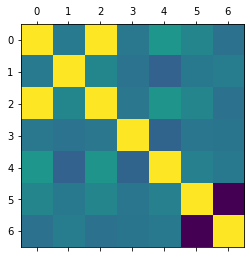

In [133]:
#Transforming the values

print(West_Nile_Virus.corr())
import matplotlib.pyplot as plt

plt.matshow(West_Nile_Virus.corr())
plt.show()

In [145]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [149]:
y_pred=model.predict(X_test)

In [152]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,    0,    3,    1,    0,    0,    0,    0],
       [   0,    0, 1895,   58,    0,    0,    0,    0],
       [   0,    0, 4357,  985,    0,    0,    0,    0],
       [   0,    0, 2999,  980,    0,    0,    0,    0],
       [   0,    0,   90,    8,    0,    0,    0,    0],
       [   0,    0,   17,    5,    0,    0,    0,    0],
       [   0,    0,  290,   98,    0,    0,    0,    0],
       [   0,    0,   10,    0,    0,    0,    0,    0]])

In [160]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class3','class4','class5','class6','class7']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         4
     class 1       0.00      0.00      0.00      1953
     class 2       0.45      0.82      0.58      5342
      class3       0.46      0.25      0.32      3979
      class4       0.00      0.00      0.00        98
      class5       0.00      0.00      0.00        22
      class6       0.00      0.00      0.00       388
      class7       0.00      0.00      0.00        10

    accuracy                           0.45     11796
   macro avg       0.11      0.13      0.11     11796
weighted avg       0.36      0.45      0.37     11796



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  45.244150559511695 %


You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
